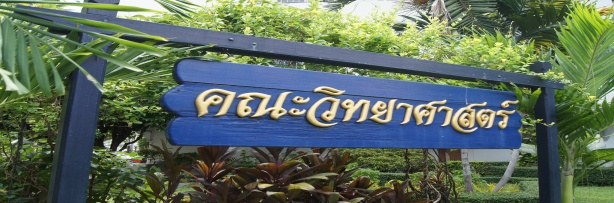

## <span style='color:lightblue;'>Local Image Thresholding </span>  

**<span style='color:Tomato;'>Local image thresholding </span>** is a technique used in image processing to convert a grayscale image into a binary image, where each pixel is either black or white. This technique is particularly useful when dealing with images that have varying lighting conditions across different areas.

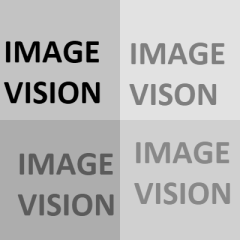

In global thresholding, a single threshold value is applied to the entire image, which can be inadequate when the lighting is uneven. Local thresholding addresses this issue by applying different threshold values to different parts of the image, based on the local characteristics of each region.

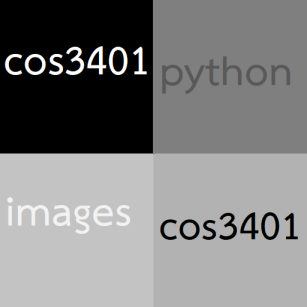

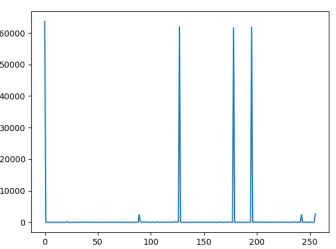

The process involves dividing the image into smaller regions (or blocks) and calculating a threshold value for each of these regions. The threshold can be determined based on various criteria, such as the mean, median, or a specific statistical measure of the pixel intensities in each block. Each pixel in a block is then compared with the local threshold; if the pixel value is higher than the threshold, it is set to white, otherwise, it is set to black.

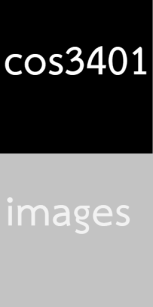     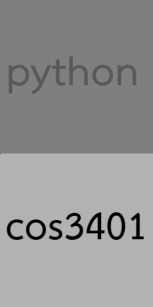

Local thresholding is particularly effective in scenarios where there are significant variations in lighting or exposure across the image, as it adapts to the local content of the image, ensuring a more accurate and visually coherent thresholding outcome. This technique is widely used in applications such as document scanning, where the quality of text can vary across a page, and in medical im

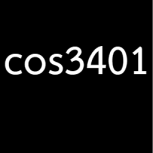   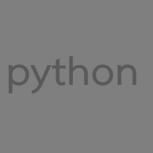

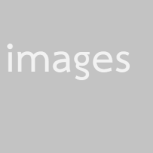   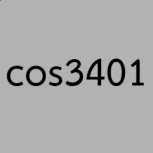



#### <span style='color:lightgreen;'>Import Libraries</span>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### <span style='color:lightgreen;'>Define Functions</span>

In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def cv_show(im,msg):
    cv2.imshow(msg,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()	

In [4]:
def Hist_image(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i, j]]+=1
    return np.array(hist)

**<span style='color:lightgreen;'>Spliting Image into 2 Sub Images</span>**

In [5]:
def splitImage(img):
    height = img.shape[0]
    width = img.shape[1]
    width_cutoff = width // 2
    left = img[:, :width_cutoff]
    right = img[:, width_cutoff:]
    return left, right

**<span style='color:lightgreen;'>1. Read Gray Level Images</span>**

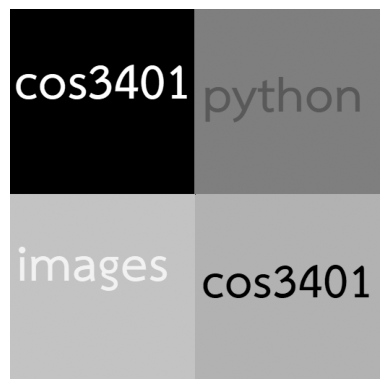

In [6]:
img = cv2.imread('cos3104.png', 0)
ShowImage(img)

**<span style='color:lightgreen;'>2. Show Histogram of  Images</span>**

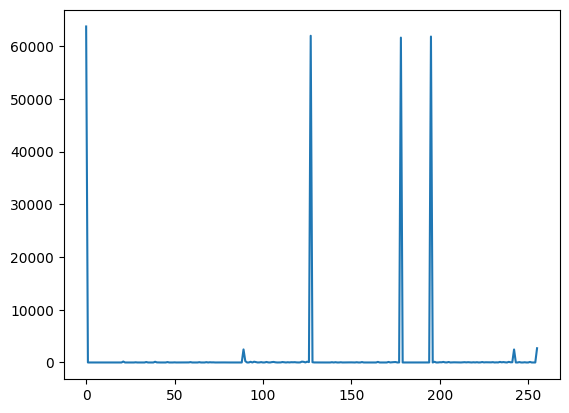

In [7]:
hist = Hist_image(img)
plt.plot(hist)
plt.show()
#plt.savefig("squares.png") 

**<span style='color:lightgreen;'>3. Image Splitting</span>**

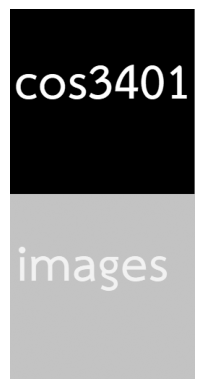

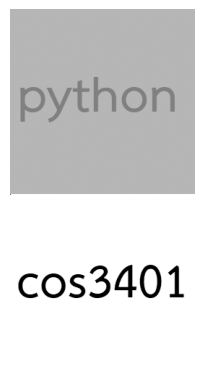

In [8]:
sub_left, sub_right = splitImage(img)
ShowImage(sub_left)
ShowImage(sub_right)
#cv2.imwrite('sub1.png', sub_1.astype(np.uint8)) 
#cv2.imwrite('sub2.png', sub_2.astype(np.uint8)) 

**<span style='color:lightgreen;'>4. Image Transpose</span>**

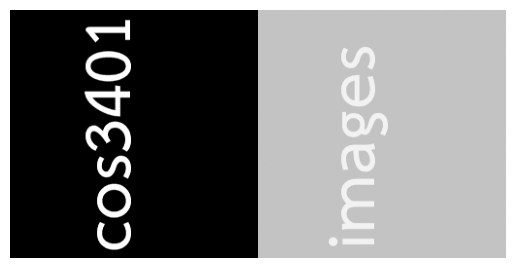

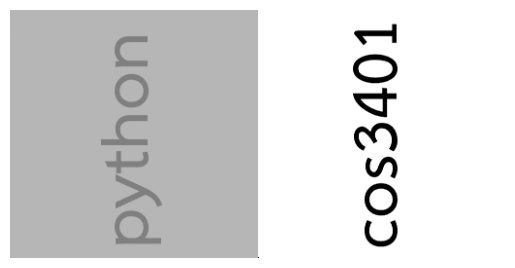

In [9]:
sub_left = cv2.rotate(sub_left, cv2.ROTATE_90_COUNTERCLOCKWISE)
sub_right = cv2.rotate(sub_right, cv2.ROTATE_90_COUNTERCLOCKWISE)
ShowImage(sub_left)
ShowImage(sub_right)

In [10]:
sub_left_1, sub_left_2 = splitImage(sub_left)
sub_right_1, sub_right_2 = splitImage(sub_right)

In [11]:
sub_left_1 = cv2.rotate(sub_left_1, cv2.ROTATE_90_CLOCKWISE)
sub_left_2 = cv2.rotate(sub_left_2, cv2.ROTATE_90_CLOCKWISE)
sub_right_1 = cv2.rotate(sub_right_1, cv2.ROTATE_90_CLOCKWISE)
sub_right_2= cv2.rotate(sub_right_2, cv2.ROTATE_90_CLOCKWISE)


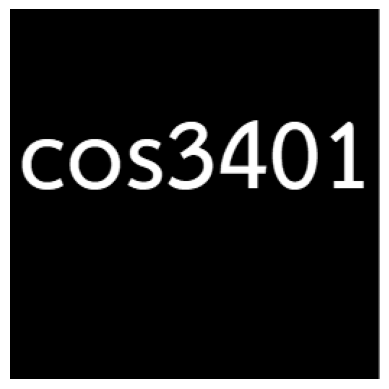

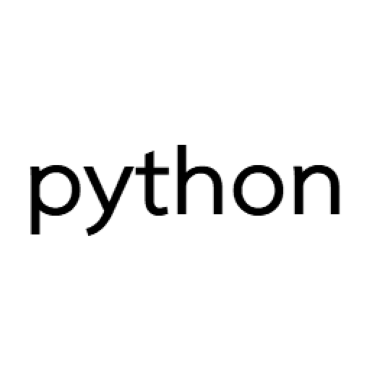

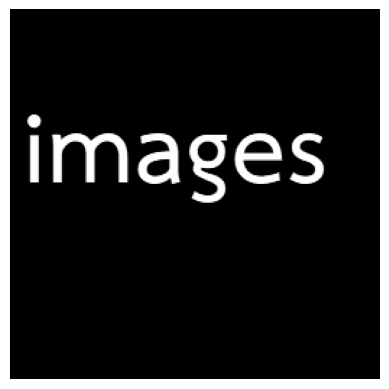

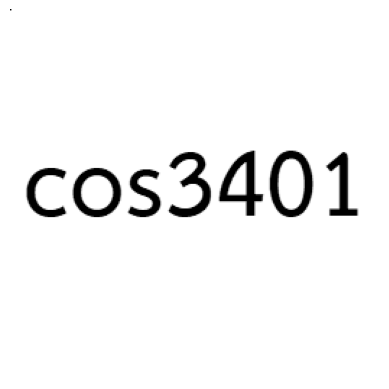

In [12]:
ShowImage(sub_left_1)
ShowImage(sub_right_1)
ShowImage(sub_left_2)
ShowImage(sub_right_2)

In [13]:
cv_show(sub_left_1, "sub image")
cv_show(sub_right_1, "sub image")
cv_show(sub_left_2, "sub image")
cv_show(sub_right_2, "sub image")


## Histogram of top-left part

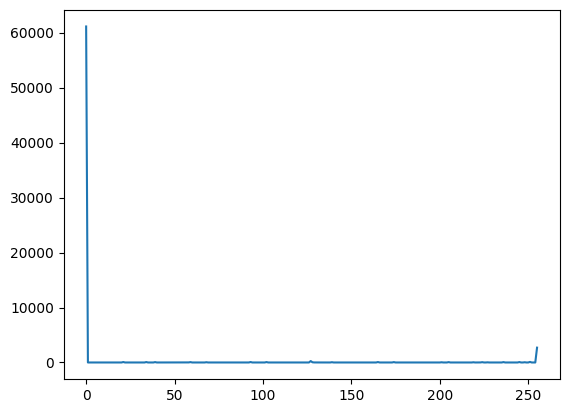

In [14]:
cv_show(sub_left_1, "sub image")
hist = Hist_image(sub_left_1)
plt.plot(hist)
plt.show()

In [15]:
img_left_1 = np.zeros_like(sub_left_1)
thresh = 100
img_left_1[sub_left_1 >= thresh] = 255
img_left_1 = 255 - img_left_1.astype(np.uint8)
imgs = cv2.hconcat([sub_left_1, img_left_1])
cv_show(imgs, "sub image")

## Histogram of bottom-left part

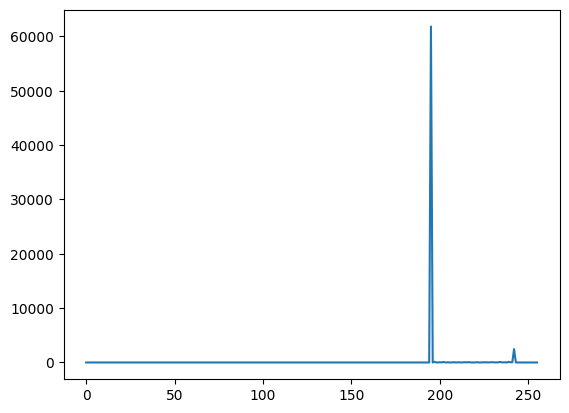

In [16]:
cv_show(sub_left_2, "sub image")
hist = Hist_image(sub_left_2)
plt.plot(hist)
plt.show()

In [17]:
img_left_2 = np.zeros_like(sub_left_2)
thresh = 220
img_left_2[sub_left_2 >= thresh] = 255
img_left_2 = 255 - img_left_2.astype(np.uint8)
imgs = cv2.hconcat([sub_left_2, img_left_2])
cv_show(imgs, "sub image")

## Histogram of top-right part

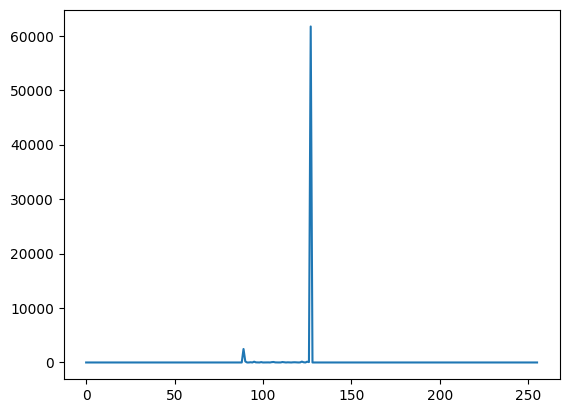

In [18]:
cv_show(sub_right_1, "sub image")
hist = Hist_image(sub_right_1)
plt.plot(hist)
plt.show()

In [19]:
img_right_1 = np.zeros_like(sub_right_1)
thresh = 105
img_right_1[sub_right_1 >= thresh] = 255
imgs = cv2.hconcat([sub_right_1, img_right_1])
cv_show(imgs, "sub image")

## Histogram of bottom-right part

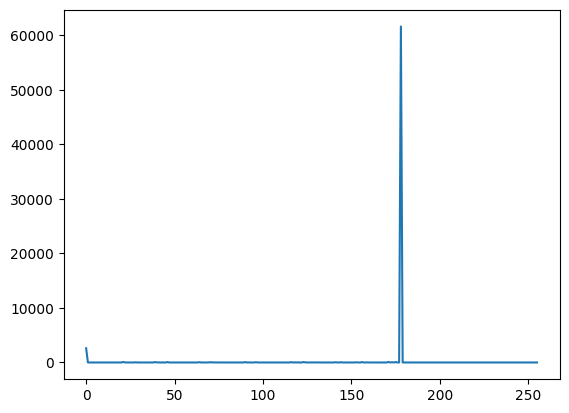

In [20]:
cv_show(sub_right_2, "sub image")
hist = Hist_image(sub_right_2)
plt.plot(hist)
plt.show()

In [21]:
img_right_2 = np.zeros_like(sub_right_2)
thresh = 105
img_right_2[sub_right_2 >= thresh] = 255
imgs = cv2.hconcat([sub_right_2, img_right_2])
cv_show(imgs, "sub image")

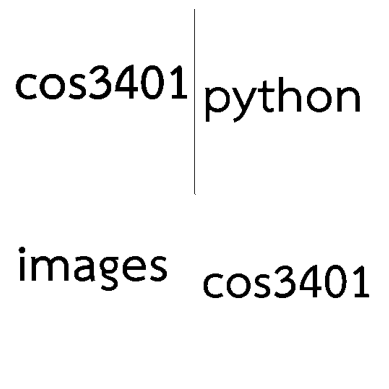

In [22]:
left = cv2.vconcat([img_left_1, img_left_2])
right = cv2.vconcat([img_right_1, img_right_2])
out = cv2.hconcat([left, right])
ShowImage(out)